In [1]:
import pandas as pd 
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('homework_10.1.csv')
df.head()

,Unnamed: 0,city,time,X,y
0,0,0,0,0.144044,7.552716
1,1,0,1,1.454274,10.077829
2,2,0,2,0.761038,12.372731
3,3,0,3,0.121675,11.489263
4,4,0,4,0.443863,13.104833


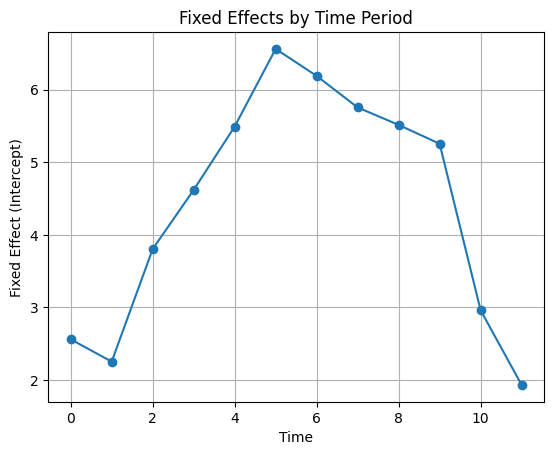

0
0     2.560534
1     2.252281
2     3.804417
3     4.618865
4     5.492543
5     6.562369
6     6.190129
7     5.755543
8     5.515259
9     5.255354
10    2.960641
11    1.931654
dtype: float64

In [3]:
# Run fixed effects regression: y ~ C(time) (categorical time dummies)
model = smf.ols("y ~ C(time)", data=df).fit()

# Extract fixed effects (intercepts for each time period)
fixed_effects = model.params.filter(like="C(time)").copy()
fixed_effects["C(time)[T.0]"] = model.params["Intercept"]
fixed_effects = fixed_effects.sort_index()

# Clean the index to show actual time values
fixed_effects.index = fixed_effects.index.str.extract(r"T\.(\d+)")[0].fillna("0").astype(int)
fixed_effects = fixed_effects.sort_index()

import matplotlib.pyplot as plt

plt.plot(fixed_effects.index, fixed_effects.values, marker="o")
plt.title("Fixed Effects by Time Period")
plt.xlabel("Time")
plt.ylabel("Fixed Effect (Intercept)")
plt.grid(True)
plt.show()

fixed_effects

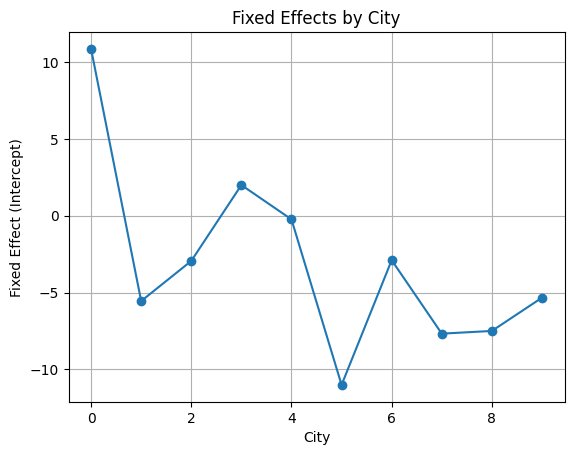

0
0    10.871199
1    -5.556128
2    -2.941539
3     2.003789
4    -0.234660
5   -11.019173
6    -2.891878
7    -7.678862
8    -7.502135
9    -5.336857
dtype: float64

In [4]:
# Run fixed effects regression: y ~ C(city)
model_city = smf.ols("y ~ C(city)", data=df).fit()

# Extract fixed effects for cities
city_effects = model_city.params.filter(like="C(city)").copy()
city_effects["C(city)[T.0]"] = model_city.params["Intercept"]
city_effects.index = city_effects.index.str.extract(r"T\.(\d+)")[0].fillna("0").astype(int)
city_effects = city_effects.sort_index()

# Plot the city fixed effects
plt.plot(city_effects.index, city_effects.values, marker="o")
plt.title("Fixed Effects by City")
plt.xlabel("City")
plt.ylabel("Fixed Effect (Intercept)")
plt.grid(True)
plt.show()

city_effects

In [7]:
import statsmodels.api as sm
import numpy as np

In [34]:
# Generate the data
num = 10000
X = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Z = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Y = np.log(X + Z) + np.random.normal(0, 1, (num,))
Y_exp = np.exp(Y)

# Fit linear model: exp(Y) ~ X + Z
df_model = pd.DataFrame({'X': X, 'Z': Z, 'Y_exp': Y_exp})
X_reg = sm.add_constant(df_model[['X', 'Z']])
model_exp = sm.OLS(df_model['Y_exp'], X_reg).fit()

model_exp.params

const   -0.029613
X        1.681084
Z        1.628486
dtype: float64

In [44]:
# Set random seed and parameters
np.random.seed(42)
num = 10000
num_trials = 100

# Store the estimated coefficients of X from 100 simulations
coef_estimates = []

for _ in range(num_trials):
    Z = np.random.normal(0, 1, (num,))
    X = Z + np.random.normal(0, 1, (num,))
    Y = 1.5 * X + 2.3 * Z + np.random.normal(0, X**2, (num,))
    
    df_temp = pd.DataFrame({'X': X, 'Z': Z, 'Y': Y})
    model = sm.OLS(df_temp['Y'], sm.add_constant(df_temp[['X', 'Z']])).fit()
    coef_estimates.append(model.params['X'])

# Calculate standard deviation of estimates across simulations (ii)
std_simulated = np.std(coef_estimates, ddof=1)

# Now compute the standard error from a single run (i)
Z = np.random.normal(0, 1, (num,))
X = Z + np.random.normal(0, 1, (num,))
Y = 1.5 * X + 2.3 * Z + np.random.normal(0, X**2, (num,))
model_single = sm.OLS(Y, sm.add_constant(np.column_stack((X, Z)))).fit()
std_python = model_single.bse[1]  # Standard error of X

std_simulated, std_python

(np.float64(0.07531989303276021), np.float64(0.03486398098988913))